# Exercícios Análise de Regressão

-----

## Heterocedasticidade e Linearização

-----

### 1 - Identificando Heterocedasticidade




In [371]:
# Importe as bibliotecas necessárias
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

#### I. Criar um conjunto de dados hipotético com uma variável independente (X) 

In [372]:
# Criando um conjunto de dados Fake
np.random.seed(11102023)
X = np.random.rand(100) * 10
X = [x for x in X] # Converte em uma lista simples


#### II. Use X para criar uma série exponencial de Y (Y = aebX)

In [373]:
a = 4
b = 0.27
Y = a * np.exp(b * np.array(X))
Y = [y for y in Y] # Converte em uma lista simples

#### III. Ajuste um modelo de regressão linear para prever Y com base em X.	

In [374]:
data = {"X":X,"Y":Y}
df = pd.DataFrame(data)
target = df.Y
features = df.drop("Y", axis=1)
features = sm.add_constant(features)

model = sm.OLS(target, features).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     882.7
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           8.18e-51
Time:                        22:20:42   Log-Likelihood:                -285.51
No. Observations:                 100   AIC:                             575.0
Df Residuals:                      98   BIC:                             580.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6918      0.821     -3.280      0.0

#### IV. Plote o gráfico de dispersão dos resíduos do modelo (resíduos vs. valores ajustados).

Text(0.5, 1.0, 'Gráfico de Dispersão dos Resíduos')

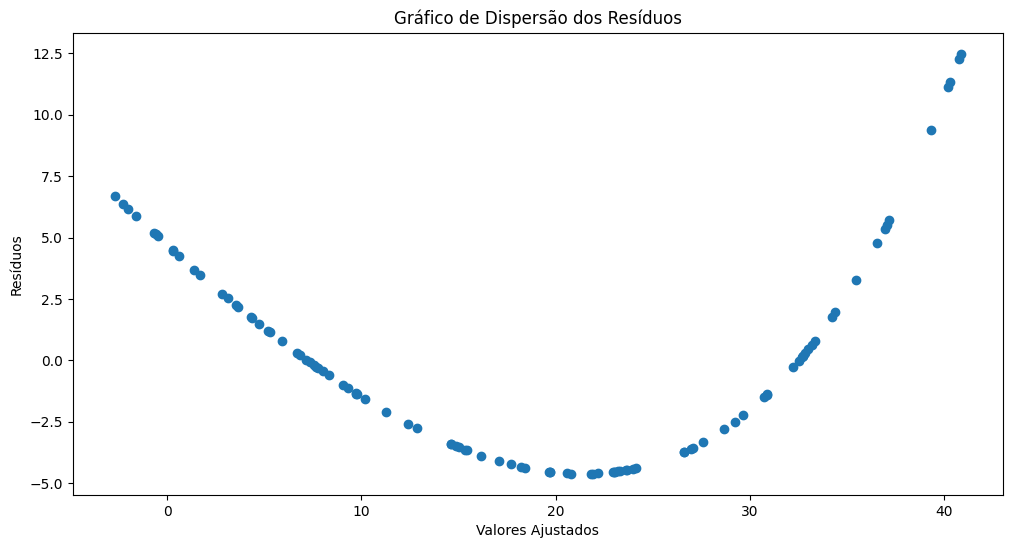

In [375]:
plt.figure(figsize=(12, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")


#### V. Visualize os resíduos em relação a X. Observe qualquer padrão nas variações dos resíduos. Isso sugere a presença de heterocedasticidade?



Os resíduos parecem não ser constantes ao longo dos valores ajustados, eles tendem a aumentar a medida que X aumenta e diminui, isso indica uma heterocedasticidade.

-----

### 2 - Teste de Breusch-Pagan

#### I - Usando o mesmo conjunto de dados do Exercício 1, execute o teste de Breusch-Pagan para verificar a heterocedasticidade.

In [376]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, features)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 11.238569724655568), ('LM-Test p-value', 0.0008011486965328548), ('F-Statistic', 12.408315521727008), ('F-Test p-value', 0.0006508882708305236)]


#### II - Interprete os resultados do teste. Se o teste indicar a presença de heterocedasticidade, o que isso significa?


O valor de (F-Test p-value) é muito pequeno, então rejeito a hipótese nula de que todos os Betas são iguais a zero, logo a hipótese alternativa é de que algum beta da variância seja zero, logo encontramos a HETEROCEDASTICIDADE

-----

### 3 - Transformações de Dados


#### I - Aplique uma transformação apropriada (por exemplo, logarítmica) aos dados de Y e ajuste o modelo de regressão linear transformado.

In [377]:
df_h = np.log(df)
target_h = df_h.Y
features_h = df_h.drop("Y", axis=1)
features_h = sm.add_constant(features_h)

model_h = sm.OLS(target_h, features_h).fit()
print(model_h.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     187.0
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.91e-24
Time:                        22:20:42   Log-Likelihood:                -59.874
No. Observations:                 100   AIC:                             123.7
Df Residuals:                      98   BIC:                             129.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0167      0.063     31.987      0.0

#### II - Plote novamente o gráfico de dispersão dos resíduos e execute o teste de Breusch-Pagan para os resíduos transformados.

Text(0.5, 1.0, 'Gráfico de Dispersão dos Resíduos')

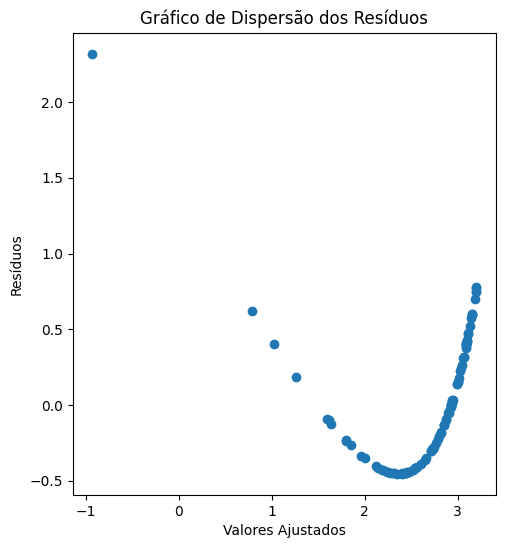

In [378]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(model_h.fittedvalues, model_h.resid)
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Gráfico de Dispersão dos Resíduos")

In [379]:
bp_test = het_breuschpagan(fit_h.resid, features_h)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 0.2769581332362492), ('LM-Test p-value', 0.5987019305722192), ('F-Statistic', 0.27217277520891786), ('F-Test p-value', 0.6030550716448085)]


#### III - Compare os resultados com o Exercício 1. A transformação dos dados aliviou a heterocedasticidade?


teste de Breusch-Pagan -> p valor do F teste é 0.6, superior à 0.05. Aceita a hipótese nula de heterocedasticidade

Logo ao transformarmos a variável usando log obtemos uma regressão sem problemas de heterocedasticidade.